# FEEED
**Fe**ature **E**xtraction for **E**vent-**D**ata

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from tqdm import tqdm
from feeed import extract_features

## Feature extraction
### Feature extraction for one single event dataset (Sepsis)

The parameter 'INPUT_PATH' specifies the path to the event dataset location in memory.

Output is a dictionary including a key and value for every feature extracted.

In [2]:
import warnings 
warnings.filterwarnings('ignore')

INPUT_PATH = 'test_data/Sepsis.xes'
sepsis_features=extract_features(INPUT_PATH)
print("Extracted ", len(sepsis_features), " features")


parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

     INFO: Sepsis.xes starting at 4, simple_stats from simple_stats took 0:00:00.010110 sec, next trace_length...
     INFO: Sepsis.xes starting at 33, trace_length from trace_length took 0:00:00.015086 sec, next trace_variant...
     INFO: Sepsis.xes starting at 44, trace_variant from trace_variant took 0:00:00.100534 sec, next activities...
     INFO: Sepsis.xes starting at 56, activities from activities took 0:00:00.063255 sec, next start_activities...
     INFO: Sepsis.xes starting at 68, start_activities from start_activities took 0:00:00.968552 sec, next end_activities...
     INFO: Sepsis.xes starting at 80, end_activities from end_activities took 0:00:00.951743 sec, next eventropies...
     INFO: Sepsis.xes starting at 96, eventropies from eventropies took 0:00:02.145013 sec, next epa_based...
     INFO: Sepsis.xes starting at 104, epa_based from epa_based took 0:00:00.623412 sec, next time_based...
     INFO: Sepsis.xes starting at 180, time_based from time_based took 0:00:00.

### Feature extraction for multiple event-logs
By especifying ['complexity'], we select **complexity features** only: 'normalized_variant_entropy', 'sequence_entropy', 'normalized_sequence_entropy', 'sequence_entropy_linear_forgetting', 'normalized_sequence_entropy_linear_forgetting', 'sequence_entropy_exponential_forgetting', 'normalized_sequence_entropy_exponential_forgetting'

The output dictionaries can be concatenated to a dataframe:

In [3]:
from feeed.utils.sort_alphanumeric import sort_files

path = "test_data"
combined_features = pd.DataFrame()

print("Extracting features")

file_names = tqdm(sort_files(os.listdir(path)))
print("FILENAMES:", [name for name in file_names if name.endswith(".xes")])#sort_files(os.listdir(path)))#filter(lambda x: x.endswith(".xes") ,
print(file_names)

for file in file_names:
    if file.endswith(".xes"):
        features = extract_features(path+"/"+file, ['epa_based'])
        temp = pd.DataFrame.from_dict([features])
        combined_features = pd.concat([combined_features, temp], ignore_index=True)

combined_features

Extracting features


100%|████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 24013.19it/s]

FILENAMES: ['BPI_Challenge_2013_closed_problems.xes', 'Sepsis.xes', 'Sepsis_backup.xes']
100%|████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 11155.06it/s]


parsing log, completed traces ::   0%|          | 0/1487 [00:00<?, ?it/s]

     INFO: BPI_Challenge_2013_closed_problems.xes starting at 9, epa_based from epa_based took 0:00:00.000318 sec, last feature.
SUCCESSFULLY: 8 features for BPI_Challenge_2013_closed_problems.xes took 0:00:00.000336 sec.


parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

     INFO: Sepsis.xes starting at 9, epa_based from epa_based took 0:00:00.000303 sec, last feature.
SUCCESSFULLY: 8 features for Sepsis.xes took 0:00:00.000325 sec.


parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

     INFO: Sepsis_backup.xes starting at 9, epa_based from epa_based took 0:00:00.000313 sec, last feature.
SUCCESSFULLY: 8 features for Sepsis_backup.xes took 0:00:00.000335 sec.


,log,epa_normalized_sequence_entropy,epa_normalized_sequence_entropy_exponential_forgetting,epa_normalized_sequence_entropy_linear_forgetting,epa_normalized_variant_entropy,epa_sequence_entropy,epa_sequence_entropy_exponential_forgetting,epa_sequence_entropy_linear_forgetting,epa_variant_entropy
0,BPI_Challenge_2013_closed_problems,0.522343,0.299505,0.219365,0.695759,76528.679475,43880.539191,32139.284589,40624.493298
1,Sepsis,0.522343,0.299505,0.219365,0.695759,76528.679475,43880.539191,32139.284589,40624.493298
2,Sepsis_backup,0.522343,0.299505,0.219365,0.695759,76528.679475,43880.539191,32139.284589,40624.493298


### Feature extraction for benchmark event data
We extracted features for multiple event data from benchmark.


In [4]:
benchmark_features = pd.read_csv("../tag/data/bpic_features.csv", index_col=None)

#benchmark_features = benchmark_features.drop(['Unnamed: 0'], axis=1)
print(benchmark_features.shape)
#print(benchmark_features.columns.tolist())
print(len(benchmark_features), " Event-Logs: ", benchmark_features.sort_values('log')['log'].unique())
benchmark_features.head()

(34, 178)
34  Event-Logs:  ['BPI2016_Complaints' 'BPI2016_Questions' 'BPI2016_Werkmap_Messages'
 'BPIC15_1' 'BPIC15_2' 'BPIC15_3' 'BPIC15_4' 'BPIC15_5'
 'BPI_Challenge_2012' 'BPI_Challenge_2013_closed_problems'
 'BPI_Challenge_2013_incidents' 'BPI_Challenge_2013_open_problems'
 'BPI_Challenge_2017' 'BPI_Challenge_2017_Offer_log' 'BPI_Challenge_2018'
 'BPI_Challenge_2019' 'CoSeLoG_WABO_1' 'CoSeLoG_WABO_2' 'CoSeLoG_WABO_3'
 'CoSeLoG_WABO_4' 'CoSeLoG_WABO_5' 'Detail_Change'
 'Detail_Incident_Activity' 'Detail_Interaction' 'DomesticDeclarations'
 'Hospital_log' 'InternationalDeclarations' 'PermitLog'
 'PrepaidTravelCost' 'Receipt_WABO_CoSeLoG' 'RequestForPayment'
 'Road_Traffic_Fine_Management_Process' 'Sepsis_Cases_Event_Log' 'finale']


,log,n_traces,n_variants,ratio_variants_per_number_of_traces,trace_len_min,trace_len_max,trace_len_mean,trace_len_median,trace_len_mode,trace_len_std,...,within_day_time_iqr,within_day_time_geometric_mean,within_day_time_geometric_std,within_day_time_harmonic_mean,within_day_time_skewness,within_day_time_kurtosis,within_day_time_coefficient_variation,within_day_time_entropy,within_day_time_skewness_hist,within_day_time_kurtosis_hist
0,BPIC15_2,832,828,0.995192,1,132,53.310096,54.0,61,19.894977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BPI_Challenge_2018,43809,28457,0.649570,24,2973,57.391541,49.0,49,34.872131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Receipt_WABO_CoSeLoG,1434,116,0.080893,1,25,5.981172,6.0,6,2.166129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BPIC15_3,1409,1349,0.957417,3,124,42.356991,42.0,44,16.138406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BPI_Challenge_2019,251734,11973,0.047562,1,990,6.339720,5.0,5,13.057417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import pandas as pd
import os
import json

# Define the directory containing the JSON files
directory = '../tag/output/features/real_event_logs_time/'

# Initialize an empty dataframe
df = pd.DataFrame()
# Iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        i_path = os.path.join(directory, filename)
        with open(i_path) as f:
            #temp_df = pd.read_json(i_path, orient='records')
            #print(temp_df)
            data = json.load(f)
            temp_df = pd.DataFrame([data])
            df = pd.concat([df, temp_df])
#df = df.set_index('log')
benchmark_time_features = pd.merge(benchmark_features, df)
#benchmark_features = pd.merge(benchmark_features, df)
print(benchmark_features.shape, benchmark_features.sort_values('log')['log'].unique())
df.head()



(34, 178) ['BPI2016_Complaints' 'BPI2016_Questions' 'BPI2016_Werkmap_Messages'
 'BPIC15_1' 'BPIC15_2' 'BPIC15_3' 'BPIC15_4' 'BPIC15_5'
 'BPI_Challenge_2012' 'BPI_Challenge_2013_closed_problems'
 'BPI_Challenge_2013_incidents' 'BPI_Challenge_2013_open_problems'
 'BPI_Challenge_2017' 'BPI_Challenge_2017_Offer_log' 'BPI_Challenge_2018'
 'BPI_Challenge_2019' 'CoSeLoG_WABO_1' 'CoSeLoG_WABO_2' 'CoSeLoG_WABO_3'
 'CoSeLoG_WABO_4' 'CoSeLoG_WABO_5' 'Detail_Change'
 'Detail_Incident_Activity' 'Detail_Interaction' 'DomesticDeclarations'
 'Hospital_log' 'InternationalDeclarations' 'PermitLog'
 'PrepaidTravelCost' 'Receipt_WABO_CoSeLoG' 'RequestForPayment'
 'Road_Traffic_Fine_Management_Process' 'Sepsis_Cases_Event_Log' 'finale']


,log,accumulated_time_time_min,accumulated_time_time_max,accumulated_time_time_mean,accumulated_time_time_median,accumulated_time_time_mode,accumulated_time_time_std,accumulated_time_time_variance,accumulated_time_time_q1,accumulated_time_time_q3,...,within_day_time_iqr,within_day_time_geometric_mean,within_day_time_geometric_std,within_day_time_harmonic_mean,within_day_time_skewness,within_day_time_kurtosis,within_day_time_coefficient_variation,within_day_time_entropy,within_day_time_skewness_hist,within_day_time_kurtosis_hist
0,BPIC15_2,0.0,1.145628e+08,7.195987e+06,3888000.00,0.0,1.090649e+07,1.189515e+14,691200.000,8380800.000,...,44011.000,52550.521152,1.527808,47979.360126,-0.026888,-1.728454,0.388055,10.621648,1.921282,2.753268
0,Receipt_WABO_CoSeLoG,0.0,2.383254e+07,2.379880e+05,130.27,0.0,9.204637e+05,8.472534e+11,33.736,10406.875,...,15654.131,38006.713071,1.276102,36885.485682,0.301650,-0.556238,0.240037,9.028104,-0.042383,-1.794202
0,BPIC15_3,0.0,1.306368e+08,4.338386e+06,2371126.00,0.0,7.671908e+06,5.885817e+13,897372.000,4698477.000,...,45520.000,50338.135137,1.558831,45638.821875,0.091144,-1.758850,0.414249,10.908731,1.718812,2.140095
0,BPI_Challenge_2019,0.0,2.217935e+09,3.151367e+06,682320.00,0.0,2.334700e+07,5.450824e+14,480.000,2899680.000,...,42120.000,40554.292135,2.416683,0.000000,-0.006671,-0.811969,0.449193,14.167672,0.283161,-1.133420
0,RequestForPayment,0.0,3.507780e+07,5.049570e+05,132234.00,0.0,1.227825e+06,1.507555e+12,10.000,607301.250,...,23279.250,41185.497033,1.411680,37709.095132,0.077411,-0.506198,0.304423,10.465119,0.487789,-1.478166


### Similarity search for event data through extracted features

In [6]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.impute import SimpleImputer

logs = benchmark_features['log']
benchmark_features_num = benchmark_features.set_index('log')
benchmark_features_num = benchmark_features_num.select_dtypes(exclude=['object'])

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_features = imputer_mean.fit_transform(benchmark_features_num)

features_similarity = pd.DataFrame(pairwise_distances(imputed_features, metric='cosine'), columns=logs, index= logs)
features_similarity.index.name=None
features_similarity.columns.name=None
print(features_similarity.shape)
features_similarity

(34, 34)


,BPIC15_2,BPI_Challenge_2018,Receipt_WABO_CoSeLoG,BPIC15_3,BPI_Challenge_2019,RequestForPayment,PrepaidTravelCost,DomesticDeclarations,BPIC15_4,BPI_Challenge_2012,...,BPI2016_Questions,BPI2016_Werkmap_Messages,BPI_Challenge_2013_open_problems,CoSeLoG_WABO_1,CoSeLoG_WABO_4,CoSeLoG_WABO_5,Detail_Change,Detail_Incident_Activity,Detail_Interaction,finale
BPIC15_2,0.000000e+00,3.113887e-08,1.110223e-16,0.000000e+00,9.143835e-09,2.908784e-14,0.000000e+00,1.836309e-13,0.000000e+00,6.149969e-12,...,0.000897,0.000386,0.005340,0.009359,0.018432,0.014294,4.440892e-16,3.222000e-11,1.422879e-09,0.036515
BPI_Challenge_2018,3.113887e-08,0.000000e+00,3.113771e-08,3.113860e-08,1.193389e-08,3.110630e-08,3.113625e-08,3.105415e-08,3.113877e-08,3.026995e-08,...,0.000897,0.000386,0.005340,0.009359,0.018432,0.014294,3.113871e-08,2.917926e-08,2.471047e-08,0.036515
Receipt_WABO_CoSeLoG,1.110223e-16,3.113771e-08,0.000000e+00,1.110223e-16,9.143343e-09,2.842171e-14,0.000000e+00,1.821876e-13,1.110223e-16,6.133760e-12,...,0.000897,0.000386,0.005340,0.009359,0.018432,0.014294,8.881784e-16,3.218337e-11,1.422728e-09,0.036515
BPIC15_3,0.000000e+00,3.113860e-08,1.110223e-16,0.000000e+00,9.143541e-09,2.842171e-14,0.000000e+00,1.821876e-13,0.000000e+00,6.146417e-12,...,0.000897,0.000386,0.005340,0.009359,0.018432,0.014294,4.440892e-16,3.220957e-11,1.422772e-09,0.036515
BPI_Challenge_2019,9.143835e-09,1.193389e-08,9.143343e-09,9.143541e-09,0.000000e+00,9.114285e-09,9.141756e-09,9.069798e-09,9.143766e-09,8.756007e-09,...,0.000897,0.000386,0.005340,0.009359,0.018432,0.014294,9.143770e-09,8.207605e-09,4.317693e-09,0.036515
RequestForPayment,2.908784e-14,3.110630e-08,2.842171e-14,2.842171e-14,9.114285e-09,0.000000e+00,2.531308e-14,6.894485e-14,2.886580e-14,5.732637e-12,...,0.000897,0.000386,0.005340,0.009359,0.018432,0.014294,2.964295e-14,3.103517e-11,1.411143e-09,0.036515
PrepaidTravelCost,0.000000e+00,3.113625e-08,0.000000e+00,0.000000e+00,9.141756e-09,2.531308e-14,0.000000e+00,1.738609e-13,0.000000e+00,6.113998e-12,...,0.000897,0.000386,0.005340,0.009359,0.018432,0.014294,7.771561e-16,3.212575e-11,1.422022e-09,0.036515
DomesticDeclarations,1.836309e-13,3.105415e-08,1.821876e-13,1.821876e-13,9.069798e-09,6.894485e-14,1.738609e-13,0.000000e+00,1.834088e-13,5.166534e-12,...,0.000897,0.000386,0.005340,0.009359,0.018432,0.014294,1.840750e-13,2.925971e-11,1.391753e-09,0.036515
BPIC15_4,0.000000e+00,3.113877e-08,1.110223e-16,0.000000e+00,9.143766e-09,2.886580e-14,0.000000e+00,1.834088e-13,0.000000e+00,6.148637e-12,...,0.000897,0.000386,0.005340,0.009359,0.018432,0.014294,4.440892e-16,3.221667e-11,1.422856e-09,0.036515
BPI_Challenge_2012,6.149969e-12,3.026995e-08,6.133760e-12,6.146417e-12,8.756007e-09,5.732637e-12,6.113998e-12,5.166534e-12,6.148637e-12,0.000000e+00,...,0.000897,0.000386,0.005340,0.009359,0.018432,0.014294,6.147860e-12,1.042866e-11,1.320322e-09,0.036515


In [7]:
links = features_similarity.stack().reset_index()
#links.index(dmf['log'])
links.columns = ['var1', 'var2', 'value']
links['sca_value'] = (links['value'] - links['value'].min()) / (links['value'].max() - links['value'].min())   

filtered_features = pd.DataFrame()
for log in logs:
    filtered_features = pd.concat([filtered_features,links[links['var1']==log].nsmallest(2, 'value')], ignore_index=True)
 
filtered_features=filtered_features.loc[(filtered_features['var1'] != filtered_features['var2'])]

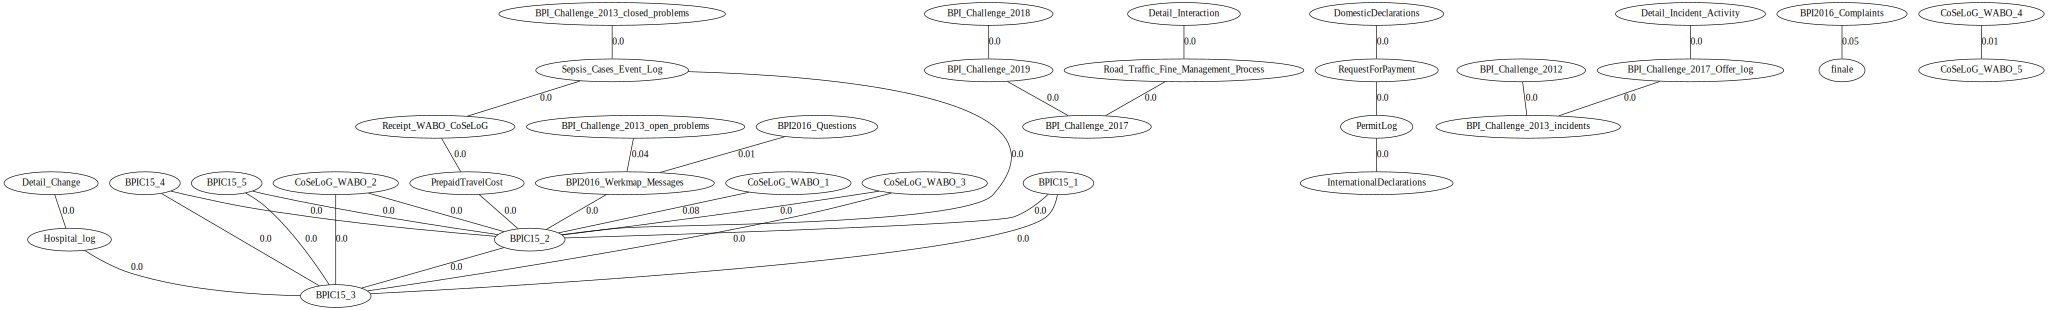

In [12]:
import graphviz as gv

#filtered_features['sca_value'] = (filtered_features['value'] - filtered_features['value'].min()) / (filtered_features['value'].max() - filtered_features['value'].min())   
filtered_features['nodes']=filtered_features.apply(lambda x: (x['var1'], x['var2']), axis=1)
e_l = filtered_features[['nodes','sca_value']].set_index('nodes').transpose().to_dict(orient='records')[0]

g = gv.Graph(format="png", strict=True)
for k, v in e_l.items():
    g.node(k[0], fontsize="15")
    g.edge(k[0], k[1], len=str(v), label=str(round(v, 2)), fontsize="15")
g
#g.render('similarity_top3_102', view = True)

In [9]:
filtered_features.sort_values('value')

,var1,var2,value,sca_value,nodes
1,BPIC15_2,BPIC15_3,0.000000e+00,0.000000e+00,"(BPIC15_2, BPIC15_3)"
41,BPIC15_1,BPIC15_3,0.000000e+00,0.000000e+00,"(BPIC15_1, BPIC15_3)"
40,BPIC15_1,BPIC15_2,0.000000e+00,0.000000e+00,"(BPIC15_1, BPIC15_2)"
33,CoSeLoG_WABO_3,BPIC15_3,0.000000e+00,0.000000e+00,"(CoSeLoG_WABO_3, BPIC15_3)"
32,CoSeLoG_WABO_3,BPIC15_2,0.000000e+00,0.000000e+00,"(CoSeLoG_WABO_3, BPIC15_2)"
30,Sepsis_Cases_Event_Log,BPIC15_2,0.000000e+00,0.000000e+00,"(Sepsis_Cases_Event_Log, BPIC15_2)"
25,CoSeLoG_WABO_2,BPIC15_3,0.000000e+00,0.000000e+00,"(CoSeLoG_WABO_2, BPIC15_3)"
24,CoSeLoG_WABO_2,BPIC15_2,0.000000e+00,0.000000e+00,"(CoSeLoG_WABO_2, BPIC15_2)"
23,BPIC15_5,BPIC15_3,0.000000e+00,0.000000e+00,"(BPIC15_5, BPIC15_3)"
22,BPIC15_5,BPIC15_2,0.000000e+00,0.000000e+00,"(BPIC15_5, BPIC15_2)"


### Extracted features value distribution in benchmark datasets

34 ['BPIC15_2' 'BPI_Challenge_2018' 'Receipt_WABO_CoSeLoG' 'BPIC15_3'
 'BPI_Challenge_2019' 'RequestForPayment' 'PrepaidTravelCost'
 'DomesticDeclarations' 'BPIC15_4' 'BPI_Challenge_2012' 'Hospital_log'
 'BPIC15_5' 'CoSeLoG_WABO_2' 'Road_Traffic_Fine_Management_Process'
 'BPI_Challenge_2017_Offer_log' 'Sepsis_Cases_Event_Log' 'CoSeLoG_WABO_3'
 'BPI_Challenge_2013_closed_problems' 'BPI_Challenge_2013_incidents'
 'PermitLog' 'BPIC15_1' 'InternationalDeclarations' 'BPI_Challenge_2017'
 'BPI2016_Complaints' 'BPI2016_Questions' 'BPI2016_Werkmap_Messages'
 'BPI_Challenge_2013_open_problems' 'CoSeLoG_WABO_1' 'CoSeLoG_WABO_4'
 'CoSeLoG_WABO_5' 'Detail_Change' 'Detail_Incident_Activity'
 'Detail_Interaction' 'finale']


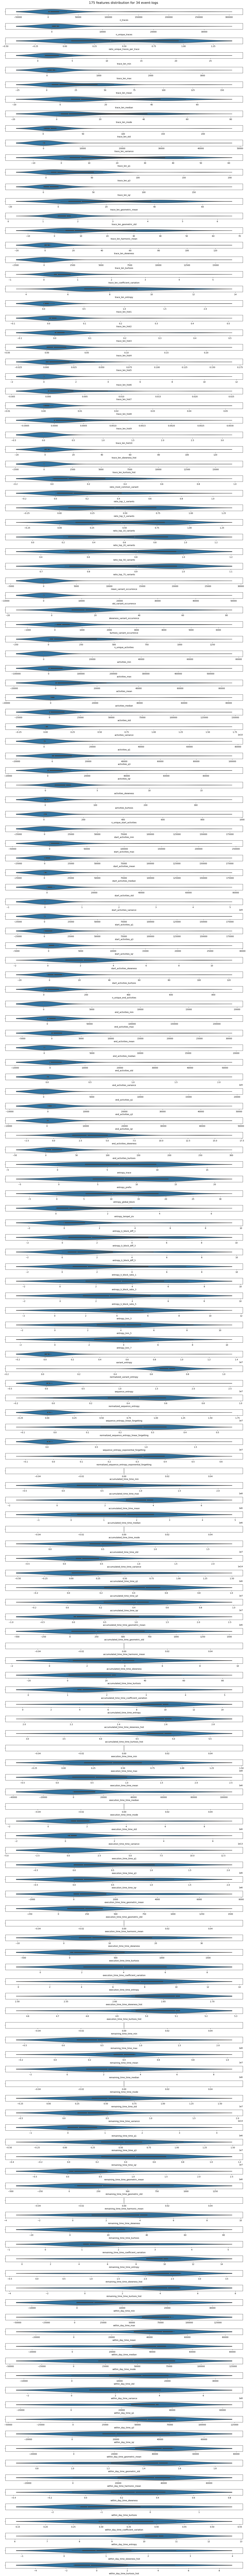

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

print(len(benchmark_features), benchmark_features['log'].unique())

columns = benchmark_features.columns[3:]
dmf1=benchmark_features.select_dtypes(exclude=['object'])

fig, axes = plt.subplots(len(dmf1.columns),1, figsize=(17,len(dmf1.columns)))
for i, ax in enumerate(axes):
        sns.violinplot(data=benchmark_features, x=dmf1.columns[i], ax=ax)
fig.suptitle(f"{len(columns)} features distribution for {len(benchmark_features)} event-logs", fontsize=16, y=1)
fig.tight_layout()

### Concatinating multiple features (Dataframe and dictionaries)

In [15]:
import json
from feeed.utils.sort_alphanumeric import sort_files
path = "../tag/output/features/real_event_logs/"
combined_features = pd.DataFrame()

file_names = tqdm(sort_files(os.listdir(path)))

combined_results = []
for file in file_names:
    f = open(path+file, 'r')
    combined_results.append(json.load(f))

new_features = pd.DataFrame(combined_results)
new_features = new_features.set_index('log')

result = pd.concat([df.reset_index(), new_features.reset_index()], axis=1, join="inner").drop(['index'], axis=1)
result.shape
result.head()
#result.to_csv("../tag/data/benchmark_features.csv")

100%|███████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 4178.86it/s]


,log,accumulated_time_time_min,accumulated_time_time_max,accumulated_time_time_mean,accumulated_time_time_median,accumulated_time_time_mode,accumulated_time_time_std,accumulated_time_time_variance,accumulated_time_time_q1,accumulated_time_time_q3,...,within_day_time_kurtosis_hist,log,variant_entropy,normalized_variant_entropy,sequence_entropy,normalized_sequence_entropy,sequence_entropy_linear_forgetting,normalized_sequence_entropy_linear_forgetting,sequence_entropy_exponential_forgetting,normalized_sequence_entropy_exponential_forgetting
0,BPIC15_2,0.0,1.145628e+08,7.195987e+06,3888000.00,0.0,1.090649e+07,1.189515e+14,691200.000,8380800.000,...,2.753268,BPI_Challenge_2012,4.749288e+05,0.708280,1.384057e+06,0.423074,7.397790e+05,0.226133,9.014471e+05,0.275551
1,Receipt_WABO_CoSeLoG,0.0,2.383254e+07,2.379880e+05,130.27,0.0,9.204637e+05,8.472534e+11,33.736,10406.875,...,-1.794202,BPI_Challenge_2013_closed_problems,3.502264e+03,0.705383,1.823159e+04,0.310940,1.679949e+04,0.286515,1.690901e+04,0.288383
2,BPIC15_3,0.0,1.306368e+08,4.338386e+06,2371126.00,0.0,7.671908e+06,5.885817e+13,897372.000,4698477.000,...,2.140095,BPI_Challenge_2013_incidents,8.867742e+04,0.717846,2.940925e+05,0.404651,2.842417e+05,0.391097,2.846260e+05,0.391625
3,BPI_Challenge_2019,0.0,2.217935e+09,3.151367e+06,682320.00,0.0,2.334700e+07,5.450824e+14,480.000,2899680.000,...,-1.133420,BPI_Challenge_2017,2.602767e+06,0.741706,7.768787e+06,0.461565,3.903568e+06,0.231922,4.888915e+06,0.290464
4,RequestForPayment,0.0,3.507780e+07,5.049570e+05,132234.00,0.0,1.227825e+06,1.507555e+12,10.000,607301.250,...,-1.478166,BPI_Challenge_2017_Offer_log,4.232263e+01,0.813479,2.481151e+05,0.105130,1.243092e+05,0.052672,1.557649e+05,0.066000


### References
| Benchmark event-log                             | Challenge URL |
|----------------------------------------|-------------------------------------------------------|
| 'BPIC15_1'                             | https://www.win.tue.nl/bpi/2015/challenge.html        |
| 'BPIC15_2'                             | https://www.win.tue.nl/bpi/2015/challenge.html        |
| 'BPIC15_3'                             | https://www.win.tue.nl/bpi/2015/challenge.html        |
| 'BPIC15_4'                             | https://www.win.tue.nl/bpi/2015/challenge.html        |
| 'BPIC15_5'                             | https://www.win.tue.nl/bpi/2015/challenge.html        |
| 'BPI_Challenge_2012'                   | https://www.win.tue.nl/bpi/2012/challenge.html        |
| 'BPI_Challenge_2013_closed_problems'   | https://www.win.tue.nl/bpi/2013/challenge.html        |
| 'BPI_Challenge_2013_incidents'         | https://www.win.tue.nl/bpi/2013/challenge.html        |
| 'BPI_Challenge_2017'                   | https://www.win.tue.nl/bpi/2017/challenge.html        |
| 'BPI_Challenge_2017_Offer_log'         | https://www.win.tue.nl/bpi/2017/challenge.html        |
| 'BPI_Challenge_2018'                   | https://www.win.tue.nl/bpi/2018/challenge.html        |
| 'BPI_Challenge_2019'                   | https://icpmconference.org/2019/icpm-2019/contests-challenges/bpi-challenge-2019/ |
| 'CoSeLoG_WABO_2'                       | -                                                     |
| 'CoSeLoG_WABO_3'                       | -                                                     |
| 'DomesticDeclarations'                 | https://icpmconference.org/2020/bpi-challenge/        |
| 'Hospital_log'                         | https://www.win.tue.nl/bpi/2011/challenge.html        |
| 'InternationalDeclarations'            | https://icpmconference.org/2020/bpi-challenge/        |
| 'PermitLog'                            | https://icpmconference.org/2020/bpi-challenge/        |
| 'PrepaidTravelCost'                    | https://icpmconference.org/2020/bpi-challenge/        |
| 'Receipt_WABO_CoSeLoG'                 | -                                                     |
| 'RequestForPayment'                    | https://icpmconference.org/2020/bpi-challenge/        |
| 'Road_Traffic_Fine_Management_Process' | -                                                     |
| 'Sepsis_Cases_Event_Log'               | https://data.4tu.nl/articles/dataset/Sepsis_Cases_-_Event_Log/12707639 |